<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Scale/S09_Scale_Calling_an_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 Scale**  Calling an API to get external data

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook is a quick demonstration of how you can call an external Application Programming Interface (API) to fetch data from providers and live sources, rather than just downloading existing files.

If you'd like to incoporate an API into your coursework, let me know! There are some nuanced to setting them up that we can review together.

## About APIs
APIs are made available by a variety of public and private sources, either for free or as a paid offering. One example that we'll use in this notebook are APIs from HERE (https://developer.here.com/) a company that provides geospatial information. Other APIs you might explore include:
- Google Maps Platform (https://mapsplatform.google.com/)
- Mapbox (https://www.mapbox.com/)
- Mapillary (https://www.mapillary.com/developer)

... and more! The internet is truly your oyster — being able to call APIs enables you to access a number of "developer" tools. Of course, that comes with the caveat that things get a little tricker to work with!


## Setting up with HERE
To set up the HERE API, go to https://developer.here.com/ and create your free account. After you do that, you'll need to:
1. Create a project in the [Project Manger](https://platform.here.com/management/projects), giving it access to relevant services, e.g. "HERE Search - One Box Search".
2. Create an app in the [Access Manager](https://platform.here.com/admin/apps), giving it access to the project you created.

You'll use the API key for your app to access data. So long as you stay under 1,000 calls a day, your access wil be free.

## Call an API from your notebook

Calling the API is quite simple using the built-in `requests` library. This comes built-in to Colab Notebooks!

In [5]:
# We'll use requests to call the API and time to manage delays
import requests
import time

Essentially, you can pass in the base URL (entrypoint and endpoint) as well as any parameters needed to complete your API request.

For each API, you will need to consult the "developer documentation" and "API reference" to fully understand the API and work with it successfully. In our case, we'll use the [HERE Search - One Box Search Geocoding API](https://platform.here.com/services/details/hrn:here:service::olp-here:search-discover-7/api-ref) from HERE. In principal, each API call wil have 3 parts:

1. The entrypoint which defines the overall API provider
2. The endpoint which defines the specific service
3. Parameters which define the API call's specific requests

In our example, we can us the `discover` endpoint on the `discover.search.hereapi.com/v1` entrpoint to find potential place of interest near a given location and matching a query string with the `at` and `q` paramters.

In [7]:
# Function to find a place from the Here Places API
def search_for_places(latitude, longitude, query):
    print(f"Searching for {query} at {latitude}, {longitude} ...")

    # being curteous with API access
    time.sleep(0.1)

    # access API via Request library, set query parameters based on arguments
    params = {
        "at": f"{latitude},{longitude}",
        # Don't forget to enter your API key here!
        "apiKey": "",
        "q": query
    }

    # make the request via URL
    r = requests.get("https://discover.search.hereapi.com/v1/discover?", params=params)

    return r

That's it! We can test this out with an example query.

In [11]:
# Try out the API call for 26 Broadway in Manhattan, NYC
api_result = search_for_places(40.70515556422382, -74.01317432574815, "coffee")
api_result_data = api_result.json()

print(f"Found {len(api_result_data['items'])} places!")

Searching for coffee at 40.70515556422382, -74.01317432574815 ...
Found 20 places!


The full response is a lot of JSON! But we can parse this like any Python data structure.

In [13]:
api_result_data

{'items': [{'title': "Gi's Coffee",
   'id': 'here:pds:place:8408lxx5-52456a3b51db02d41aaf808c95720c7e',
   'language': 'en',
   'ontologyId': 'here:cm:ontology:coffee',
   'resultType': 'place',
   'address': {'label': "Gi's Coffee, 11 Broadway, New York, NY 10004-1047, United States",
    'countryCode': 'USA',
    'countryName': 'United States',
    'stateCode': 'NY',
    'state': 'New York',
    'county': 'New York',
    'city': 'New York',
    'district': 'Financial District',
    'street': 'Broadway',
    'postalCode': '10004-1047',
    'houseNumber': '11'},
   'position': {'lat': 40.70537, 'lng': -74.01385},
   'access': [{'lat': 40.70532, 'lng': -74.01373}],
   'distance': 62,
   'categories': [{'id': '100-1100-0010',
     'name': 'Coffee Shop',
     'primary': True}],
   'references': [{'supplier': {'id': 'yelp'},
     'id': 'I51sxb_ouhsnEMP7dgK8Cw'}]},
  {'title': 'Starbucks',
   'id': 'here:pds:place:840dr5re-7f85a287c88549df816dbee3f48f5ff0',
   'language': 'en',
   'ontolog

In [22]:
for place in api_result_data['items']:
    print(place['address']['label'])

Gi's Coffee, 11 Broadway, New York, NY 10004-1047, United States
Starbucks, 2 Broadway, New York, NY 10004-2207, United States
VIVI Bubble Tea, 18 Beaver St, New York, NY 10004-2327, United States
Dunkin', Beaver St, New York, NY 10004, United States
Gregorys Coffee, 42 Broadway, New York, NY 10004-1638, United States
Don & Pauls, 68 Broad St, New York, NY 10004, United States
Gregorys Coffee, 80 Broad St, New York, NY 10004-2214, United States
New York State United Teachers, 52 Canyon of Heroes, New York, NY 10004-1603, United States
Cafe Grumpy, 20 Stone St, New York, NY 10004-2202, United States
Starbucks, 55 Broadway, New York, NY 10006-3008, United States
Dunkin', Broad St, New York, NY 10004, United States
Starbucks, 1 Battery Park Plz, New York, NY 10004-1402, United States
Bean & Bean, 71 Broadway, New York, NY 10006-2600, United States
Springbone, 74 Pearl St, New York, NY 10004-2719, United States
Dunkin', 19 Rector St, New York, NY 10006-2300, United States
American Coffee, 

## Integrating APIs into a dataframe

Now you can pretty easily use this same logic in a `apply` function!

In [23]:
# Connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import geopandas as gpd

<Axes: >

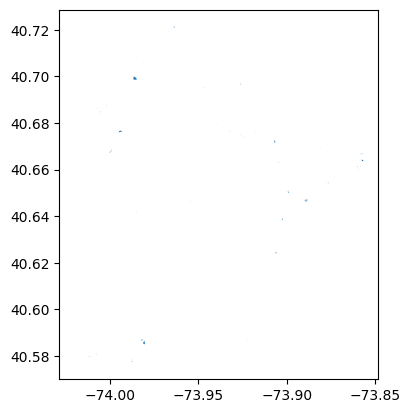

In [27]:
ten_vacant_lots = gpd.read_file('/content/drive/MyDrive/Cornell AAP - MSAUD/ARCH 6131/Example Data/brooklyn_city_vacant_lots.geojson').sample(10)
ten_vacant_lots.plot()

In [34]:
# Function to find a place from the Here Places API
def search_for_coffee(row):

    pt = row.geometry.centroid
    latitude = pt.y
    longitude = pt.x

    # being curteous with API access
    time.sleep(0.1)

    # access API via Request library, set query parameters based on arguments
    params = {
        "at": f"{latitude},{longitude}",
        # Don't forget to enter your API key here!
        "apiKey": "",
        "q": "coffee"
    }

    # make the request via URL
    r = requests.get("https://discover.search.hereapi.com/v1/discover?", params=params)

    return r.json()['items'][0]['address']['label']

In [35]:
one_hundred_vacant_lots['coffee'] = one_hundred_vacant_lots.apply(search_for_coffee, axis=1)

In [38]:
one_hundred_vacant_lots[['geometry', 'coffee']]

,geometry,coffee
361,"POLYGON ((-73.96612 40.71830, -73.96615 40.718...","Devocion, 69 Grand St, Brooklyn, NY 11249-4110..."
335,"POLYGON ((-73.96991 40.70931, -73.96991 40.709...","Social House Cafe, 60 Broadway, Brooklyn, NY 1..."
227,"POLYGON ((-73.91368 40.67223, -73.91398 40.672...","Dunkin', 1710 Eastern Pkwy, Brooklyn, NY 11233..."
167,"POLYGON ((-73.93937 40.67424, -73.93930 40.674...","Bakerie, 252 Albany Ave, Brooklyn, NY 11213-13..."
727,"POLYGON ((-73.98026 40.58507, -73.98084 40.585...","Dunkin', 2978 Cropsey Ave, Brooklyn, NY 11214-..."
...,...,...
570,"POLYGON ((-73.91479 40.65444, -73.91483 40.654...","Adj Coffee Shop, 1 Brookdale Plz, Brooklyn, NY..."
636,"POLYGON ((-73.96021 40.61839, -73.96022 40.618...","Dunkin', 1510 Elm Ave, Brooklyn, NY 11230, Uni..."
915,"POLYGON ((-73.87770 40.65422, -73.87761 40.654...","Dunkin', 339 Gateway Dr, Brooklyn, NY 11239-28..."
950,"POLYGON ((-73.98483 40.64146, -73.98494 40.641...","Dunkin', 110 Beverley Rd, Brooklyn, NY 11218-3..."
